In [4]:
# load dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
marketing_df = pd.read_csv('Marketing_Analysis.csv')
marketing_df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,11,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


In [6]:
marketing_df.tail()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
45208,45207,51,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45209,45208,71,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45210,45209,72,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45211,45210,57,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no
45212,45211,37,120000,2971,married,"entrepreneur,secondary",yes,no,no,no,cellular,17,"nov, 2017",6.01666666666667 min,2,188,11,other,no


In [7]:
marketing_df.shape

(45213, 19)

In [8]:
marketing_df.isnull().sum()

banking marketing     0
Unnamed: 1           21
Unnamed: 2            0
Unnamed: 3            1
Unnamed: 4            0
Unnamed: 5            1
Unnamed: 6            0
Unnamed: 7            1
Unnamed: 8            0
Unnamed: 9            1
Unnamed: 10           0
Unnamed: 11           1
Unnamed: 12          50
Unnamed: 13           0
Unnamed: 14           1
Unnamed: 15           1
Unnamed: 16           1
Unnamed: 17           0
Unnamed: 18          30
dtype: int64

In [9]:
# grab the second row and assign it to new_header dataframe
new_header = marketing_df.iloc[1]

# restructure marketing_df to exclude the header
marketing_df = marketing_df[2:]

# make the new_header the marketing_df's header
marketing_df.columns = new_header

In [10]:
marketing_df.head()

1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
5,4,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
6,5,33,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [11]:
# drop the customerid column.
marketing_df.drop('customerid', axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [12]:
marketing_df.head()

1,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
5,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
6,33,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [13]:
# split jobedu into job and education columns
marketing_df[['job','education']] = marketing_df['jobedu'].str.split(',',expand=True)

In [14]:
marketing_df.head()

1,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
2,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
3,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
4,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
5,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
6,33,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [15]:
# drop the customerid column.
marketing_df.drop('jobedu', axis = 1, inplace = True)

In [16]:
marketing_df.isnull().sum()

1
age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [17]:
marketing_df.age.dtypes

dtype('O')

In [18]:
print(marketing_df[marketing_df['age'].isnull()])

1      age  salary balance  ... response            job  education
163    NaN   60000      47  ...       no     technician   tertiary
1023   NaN   60000    -500  ...       no     technician  secondary
1587   NaN  100000     123  ...       no     management  secondary
3945   NaN   70000      62  ...       no       services   tertiary
5677   NaN   20000     -85  ...       no    blue-collar    primary
6875   NaN   70000    1336  ...       no       services  secondary
9694   NaN   50000    -162  ...       no         admin.   tertiary
11655  NaN    8000    2562  ...       no     unemployed    primary
13419  NaN   20000     452  ...       no    blue-collar    primary
14543  NaN   20000     -84  ...       no    blue-collar  secondary
17161  NaN  120000   -2082  ...       no   entrepreneur  secondary
19459  NaN   60000    1055  ...       no     technician  secondary
23485  NaN  120000     456  ...       no   entrepreneur  secondary
23941  NaN   20000      85  ...       no    blue-collar    pri

In [19]:
marketing_df['age'] = pd.to_numeric(marketing_df['age'], errors='coerce')

In [20]:
#using mean
marketing_df['age'].fillna(int(marketing_df['age'].mean()), inplace=True)

In [21]:
marketing_df.isnull().sum()

1
age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [22]:
marketing_df['month'].value_counts()

may, 2017    13747
jul, 2017     6888
aug, 2017     6240
jun, 2017     5335
nov, 2017     3968
apr, 2017     2931
feb, 2017     2646
jan, 2017     1402
oct, 2017      738
sep, 2017      576
mar, 2017      476
dec, 2017      214
Name: month, dtype: int64

In [23]:
marketing_df['month'].mode()

0    may, 2017
dtype: object

In [24]:
marketing_df['month'].fillna(marketing_df['month'].mode(), inplace=True)

In [25]:
marketing_df['month'].dtypes

dtype('O')

In [26]:
# assign mode value to a variable
mode_df = marketing_df.month.mode()[0]

In [27]:
# now we fill the NaN values with mode_df's value which is the mode
marketing_df.month.fillna(mode_df, inplace = True)

In [28]:
marketing_df.isnull().sum()

1
age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [29]:
marketing_df.shape

(45211, 19)

In [30]:
# dropping response feature with NaN values
marketing_df = marketing_df.dropna()

In [31]:
marketing_df.isnull().sum()

1
age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

In [32]:
marketing_df.shape

(45181, 19)

In [33]:
# checking data types prior to scatter plot
marketing_df.dtypes

1
age          float64
salary        object
balance       object
marital       object
targeted      object
default       object
housing       object
loan          object
contact       object
day           object
month         object
duration      object
campaign      object
pdays         object
previous      object
poutcome      object
response      object
job           object
education     object
dtype: object

In [34]:
# converting age, salary, and balance from float/object to integer
marketing_df['age'] = marketing_df['age'].astype(int)

In [35]:
marketing_df['salary'] = marketing_df['salary'].astype(int)

In [36]:
marketing_df['balance'] = marketing_df['balance'].astype(int)

In [37]:
marketing_df.dtypes

1
age           int64
salary        int64
balance       int64
marital      object
targeted     object
default      object
housing      object
loan         object
contact      object
day          object
month        object
duration     object
campaign     object
pdays        object
previous     object
poutcome     object
response     object
job          object
education    object
dtype: object

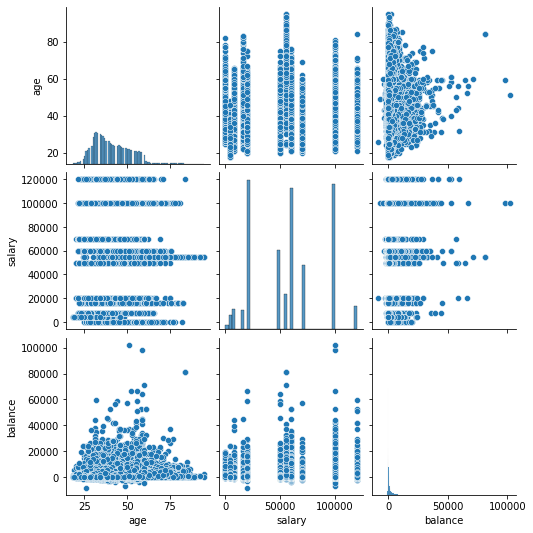

In [38]:
# simple pairplot, nothing fancy
sns.pairplot(marketing_df)

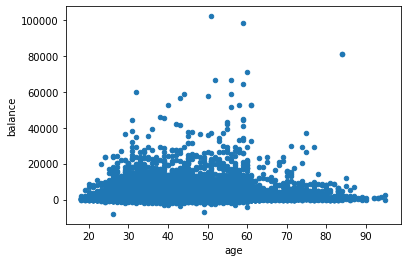

In [39]:
# zoom in on age vs balance
marketing_df.plot.scatter(x='age',y='balance')
plt.show()

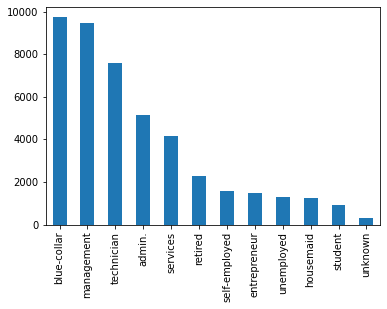

In [40]:
job_count = marketing_df['job'].value_counts()
job_count.plot.bar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd268e88790>]],
      dtype=object)

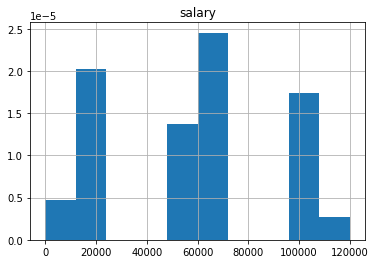

In [41]:
marketing_df.hist(column=['salary'], density=True, stacked=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd268e431d0>]],
      dtype=object)

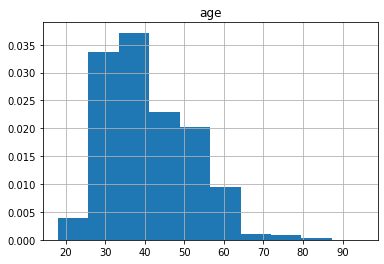

In [42]:
marketing_df.hist(column=['age'], density=True, stacked=True)

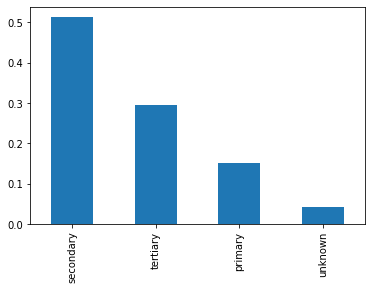

In [43]:
# getting count of each education level and turn them into percentage
marketing_df.education.value_counts(normalize=True)

# bar plot of the education
marketing_df.education.value_counts(normalize=True).plot.bar()
plt.show()

In [44]:
# replace response yes with 1 and no with 0
marketing_df['response'].replace({'no': 0, 'yes': 1}, inplace=True)

In [45]:
# replace loan yes with 1 and no with 0
marketing_df['loan'].replace({'no': 0, 'yes': 1}, inplace=True)

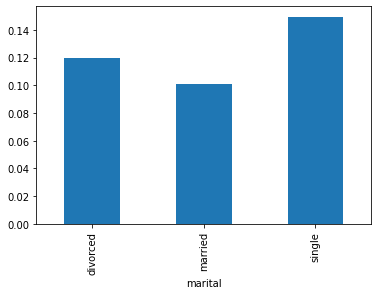

In [46]:
# response rate of various marital status
marketing_df.groupby('marital')['response'].mean().plot.bar()
plt.show()

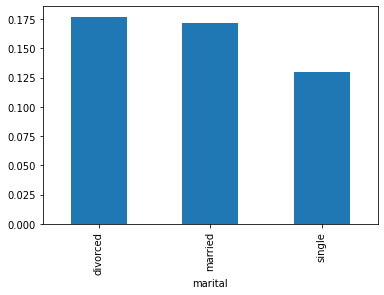

In [47]:
# loan rate of various marital status
marketing_df.groupby('marital')['loan'].mean().plot.bar()
plt.show()

In [48]:
# replace marital married with 1 and single with 0
marketing_df['marital'].replace({'married': 1, 'single': 0}, inplace=True)

In [49]:
# looking at correlation between features
marketing_df.corr()

1,age,salary,balance,loan,response
1,,,,,
age,1.000000,0.024506,0.097705,-0.015751,0.025073
salary,0.024506,1.000000,0.055453,0.017787,0.020042
balance,0.097705,0.055453,1.000000,-0.084272,0.052850
loan,-0.015751,0.017787,-0.084272,1.000000,-0.068140
response,0.025073,0.020042,0.052850,-0.068140,1.000000


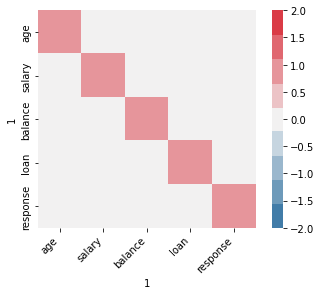

In [54]:
# plotting correlation using heatmap for easy viewing
corr = marketing_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-2, vmax=2, center=0,
    cmap=sns.diverging_palette(240, 10, n=9),
    square=True
)
# making the X label
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);